In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from scipy.stats import ttest_ind_from_stats
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def calcHistogramDistance(dist1, dist2):
    t=np.sqrt(dist1*dist2).sum()
    #t=t[t!=0]
    if t==0:
        return -1
    else:
        d=np.log(t)*-1
        return d

In [3]:
def getDisposedLoyalty(row):
    #If Disposed and Purchased vehicle are not the same brand, mark as not conquest. If same, Loyal.
    if row['New Model Purchased - Brand'] == row['Brand (Disposed)']:
        return 'Disposed Loyal'
    elif row['Brand (Disposed)'] == 'Did Not Own':
        return 'First Purchase'
    elif row['Brand (Disposed)'] == 'Did Not Dispose':
        return 'Did Not Dispose'
    else:
        return 'Disposed Conquest'

In [4]:
def getFleetLoyalty(row):
    if len(row['fleetSet'])==0:
        return 'Empty Fleet'
    elif row['New Model Purchased - Brand'] in row['fleetSet']:
        return 'Fleet Loyal'
    else:
        return 'Fleet Conquest'

In [5]:
def getShoppedSet(row):
    #create set of shopped vehicles, add to shoppedCountDict count
    shoppedVars = ['New Model Purchased - Brand','Brands Seriously Considered (Most Serious, 2nd,3rd Choice) (1)','Brands Seriously Considered (Most Serious, 2nd,3rd Choice) (2)','Brands Seriously Considered (Most Serious, 2nd,3rd Choice) (3)']
    shoppedSet = [row[j] for j in shoppedVars if row[j] not in [' ', 'No Other Make Considered']]
    shoppedSet = frozenset(shoppedSet)
    return shoppedSet

In [6]:
def getFleetSet(row):
    #create set of owned vehicles, add to ownedCountDict count
    fleetVars = ['Total Brand In Household Fleet (Mk) (2)','Total Brand In Household Fleet (Mk) (3)','Total Brand In Household Fleet (Mk) (4)']
    fleetSet = [row[j] for j in fleetVars if row[j] not in [' ', 'No Other Vehicle Owned', 'Did Not Own']]
    fleetSet = frozenset(fleetSet)
    return fleetSet

In [7]:
def shoppedOwnedComparison(row):
    shoppedVars = ['New Model Purchased - Brand','Brands Seriously Considered (Most Serious, 2nd,3rd Choice) (1)','Brands Seriously Considered (Most Serious, 2nd,3rd Choice) (2)','Brands Seriously Considered (Most Serious, 2nd,3rd Choice) (3)']
    shoppedSet = frozenset([row[j] for j in shoppedVars if row[j] not in [' ', 'No Other Make Considered']])
    ownedVars = ['Brand (Disposed)','Total Brand In Household Fleet (Mk) (2)','Total Brand In Household Fleet (Mk) (3)','Total Brand In Household Fleet (Mk) (4)']
    ownedSet = frozenset([row[j] for j in ownedVars if row[j] not in [' ', 'No Other Vehicle Owned', 'Did Not Own']])
    
    if len(ownedSet)==0:
        return 'First Owned'
    if shoppedSet <= ownedSet:
        return 'Only Shopped Previously Owned'
    elif len(shoppedSet&ownedSet)>0:
        return 'Shopped Mix of Owned and New'
    else:
        return 'Only Shopped New'

In [8]:
def shoppedPurchase(row):
    if len(row['shoppedSet']) > 1:
        return 'Shopped Multiple Brands'
    else:
        return 'Only Shopped Purchase Brands'

In [9]:
def disposedLoyalConquestOther(row):
    if row['Brand (Disposed)'] == row['New Model Purchased - Brand']:
        return 'Disposed Loyal'
    elif row['Brand (Disposed)'] == 'Did Not Dispose':
        return 'Not Disposed'
    else:
        return 'Disposed Conquest'

In [10]:
def fleetLoyalConquestOther(row):
    if len(row['fleetSet']) == 0:
        return'Empty Fleet'
    elif row['New Model Purchased - Brand'] in row['fleetSet']:
        return 'Fleet Loyal'
    else:
        return 'Fleet Conquest'

In [11]:
#f = open(r'D:\LocalData\peterk2\Desktop\SV 2016 data.csv', encoding ='utf-8')
df = pd.read_csv(r'D:\LocalData\peterk2\Desktop\Strat Vis Shopping Analysis\SV 2016 data for Analysis model plus loyalty weights.csv',encoding = 'ISO-8859-1', dtype=str).fillna(' ')

In [12]:
df['shoppedSet'] = df.apply(getShoppedSet, axis=1)
df['fleetSet'] = df.apply(getFleetSet, axis=1)
df['Disposed Loyal Conquest Other'] = df.apply(getDisposedLoyalty, axis=1)
df['Fleet Loyal Conquest Other'] = df.apply(getFleetLoyalty, axis=1)
df['OnlyShoppedPurchase'] = df.apply(shoppedPurchase, axis=1)
df['Shop Owned Comparison'] = df.apply(shoppedOwnedComparison, axis=1)

In [13]:
df['Sales Weighting'] = df['Sales Weighting'].apply(pd.to_numeric)

In [14]:
df['Concatenated Groups'] = df['Disposed Loyal Conquest Other']+df['Fleet Loyal Conquest Other']+df['OnlyShoppedPurchase']+df['New?']

In [15]:
a = df.groupby(['Concatenated Groups','New Model Purchased - Brand'])['Sales Weighting'].sum().unstack().fillna(0.0)

In [16]:
a/a.sum()

New Model Purchased - Brand,Buick,Chevrolet,Chrysler,Dodge,Fiat,Ford,GMC,Honda,Hyundai,Jeep,Kia,Mazda,Mercedes-Benz,Mitsubishi,Nissan,Ram,Subaru,Toyota,Volkswagen
Concatenated Groups,,,,,,,,,,,,,,,,,,,
Disposed ConquestEmpty FleetOnly Shopped Purchase Brands0,0.058751,0.040631,0.092275,0.073269,0.020611,0.043201,0.041919,0.041599,0.064373,0.066714,0.088291,0.043707,0.000000,0.056643,0.082692,0.069549,0.071010,0.064236,0.032408
Disposed ConquestEmpty FleetOnly Shopped Purchase Brands1,0.028608,0.011149,0.021990,0.014077,0.009463,0.006049,0.010922,0.010206,0.014675,0.021755,0.015252,0.011334,0.025862,0.006034,0.011593,0.010435,0.015445,0.008106,0.014816
Disposed ConquestEmpty FleetShopped Multiple Brands0,0.056020,0.027508,0.105106,0.056507,0.068207,0.044437,0.026430,0.078726,0.092995,0.072050,0.095474,0.112147,0.000000,0.144018,0.083969,0.035148,0.081637,0.062132,0.102836
Disposed ConquestEmpty FleetShopped Multiple Brands1,0.033210,0.012967,0.022717,0.015935,0.013477,0.012070,0.017519,0.014665,0.016960,0.023466,0.016903,0.030483,0.000000,0.014601,0.016822,0.014907,0.020953,0.013493,0.018251
Disposed ConquestFleet ConquestOnly Shopped Purchase Brands0,0.110970,0.070676,0.171721,0.146378,0.345998,0.056213,0.119462,0.068615,0.069220,0.171298,0.152953,0.058305,0.000000,0.133696,0.102643,0.186851,0.126509,0.051465,0.060896
Disposed ConquestFleet ConquestOnly Shopped Purchase Brands1,0.057724,0.022175,0.045071,0.053063,0.089603,0.015396,0.047368,0.013767,0.019362,0.052677,0.016966,0.020047,0.025862,0.016689,0.018027,0.074410,0.041333,0.016740,0.018983
Disposed ConquestFleet ConquestShopped Multiple Brands0,0.228799,0.112365,0.198614,0.179560,0.268192,0.093585,0.274731,0.143966,0.200753,0.180496,0.219410,0.313486,0.000000,0.361827,0.175387,0.294218,0.215227,0.105001,0.214819
Disposed ConquestFleet ConquestShopped Multiple Brands1,0.092073,0.035835,0.069719,0.063956,0.044734,0.036760,0.090956,0.040354,0.045058,0.051516,0.044383,0.081133,0.077586,0.050855,0.044868,0.085529,0.064890,0.033744,0.046392
Disposed ConquestFleet LoyalOnly Shopped Purchase Brands0,0.013103,0.076956,0.012830,0.036971,0.000000,0.047992,0.028395,0.067899,0.070134,0.035420,0.032629,0.014609,0.000000,0.039377,0.034984,0.042413,0.060541,0.059788,0.045283


In [17]:
b = df.groupby('Concatenated Groups')['Sales Weighting'].sum()#.unstack().fillna(0.0)
(b/b.sum()).sort_values()

Concatenated Groups
Disposed ConquestEmpty FleetOnly Shopped Purchase Brands1       0.011620
Disposed LoyalEmpty FleetShopped Multiple Brands1               0.012992
Disposed LoyalFleet LoyalShopped Multiple Brands1               0.013706
Disposed ConquestFleet LoyalOnly Shopped Purchase Brands1       0.014377
Disposed ConquestFleet LoyalShopped Multiple Brands1            0.015741
Disposed ConquestEmpty FleetShopped Multiple Brands1            0.016151
Disposed LoyalFleet LoyalShopped Multiple Brands0               0.016162
Disposed LoyalEmpty FleetShopped Multiple Brands0               0.017582
Disposed LoyalFleet ConquestShopped Multiple Brands1            0.025328
Disposed ConquestFleet ConquestOnly Shopped Purchase Brands1    0.025716
Disposed LoyalEmpty FleetOnly Shopped Purchase Brands1          0.031696
Disposed LoyalEmpty FleetOnly Shopped Purchase Brands0          0.036225
Disposed LoyalFleet ConquestShopped Multiple Brands0            0.037668
Disposed LoyalFleet LoyalOnly S

In [18]:
dropList = ['First PurchaseFleet LoyalShopped Multiple BrandsOnly Shopped Previously Owned','Did Not DisposeEmpty FleetShopped Multiple BrandsOnly Shopped New','Disposed LoyalFleet LoyalShopped Multiple BrandsOnly Shopped Previously Owned','Did Not DisposeEmpty FleetOnly Shopped Purchase BrandsOnly Shopped New','First PurchaseFleet ConquestShopped Multiple BrandsShopped Mix of Owned and New','First PurchaseFleet LoyalShopped Multiple BrandsShopped Mix of Owned and New','Did Not DisposeFleet LoyalShopped Multiple BrandsOnly Shopped Previously Owned','First PurchaseFleet LoyalOnly Shopped Purchase BrandsOnly Shopped Previously Owned','First PurchaseFleet ConquestOnly Shopped Purchase BrandsOnly Shopped New','First PurchaseFleet ConquestShopped Multiple BrandsOnly Shopped New','First PurchaseEmpty FleetShopped Multiple BrandsFirst Owned','Disposed LoyalFleet ConquestShopped Multiple BrandsOnly Shopped Previously Owned','First PurchaseEmpty FleetOnly Shopped Purchase BrandsFirst Owned']
dfWorking = df[~df['Concatenated Groups'].isin(dropList)]

In [19]:
a = dfWorking.groupby(['Concatenated Groups','New Model Purchased - Brand'])['Sales Weighting'].sum().unstack().fillna(0.0)
catByBrand = a/a.sum()

In [20]:
catByBrand

New Model Purchased - Brand,Buick,Chevrolet,Chrysler,Dodge,Fiat,Ford,GMC,Honda,Hyundai,Jeep,Kia,Mazda,Mercedes-Benz,Mitsubishi,Nissan,Ram,Subaru,Toyota,Volkswagen
Concatenated Groups,,,,,,,,,,,,,,,,,,,
Disposed ConquestEmpty FleetOnly Shopped Purchase Brands0,0.058751,0.040631,0.092275,0.073269,0.020611,0.043201,0.041919,0.041599,0.064373,0.066714,0.088291,0.043707,0.000000,0.056643,0.082692,0.069549,0.071010,0.064236,0.032408
Disposed ConquestEmpty FleetOnly Shopped Purchase Brands1,0.028608,0.011149,0.021990,0.014077,0.009463,0.006049,0.010922,0.010206,0.014675,0.021755,0.015252,0.011334,0.025862,0.006034,0.011593,0.010435,0.015445,0.008106,0.014816
Disposed ConquestEmpty FleetShopped Multiple Brands0,0.056020,0.027508,0.105106,0.056507,0.068207,0.044437,0.026430,0.078726,0.092995,0.072050,0.095474,0.112147,0.000000,0.144018,0.083969,0.035148,0.081637,0.062132,0.102836
Disposed ConquestEmpty FleetShopped Multiple Brands1,0.033210,0.012967,0.022717,0.015935,0.013477,0.012070,0.017519,0.014665,0.016960,0.023466,0.016903,0.030483,0.000000,0.014601,0.016822,0.014907,0.020953,0.013493,0.018251
Disposed ConquestFleet ConquestOnly Shopped Purchase Brands0,0.110970,0.070676,0.171721,0.146378,0.345998,0.056213,0.119462,0.068615,0.069220,0.171298,0.152953,0.058305,0.000000,0.133696,0.102643,0.186851,0.126509,0.051465,0.060896
Disposed ConquestFleet ConquestOnly Shopped Purchase Brands1,0.057724,0.022175,0.045071,0.053063,0.089603,0.015396,0.047368,0.013767,0.019362,0.052677,0.016966,0.020047,0.025862,0.016689,0.018027,0.074410,0.041333,0.016740,0.018983
Disposed ConquestFleet ConquestShopped Multiple Brands0,0.228799,0.112365,0.198614,0.179560,0.268192,0.093585,0.274731,0.143966,0.200753,0.180496,0.219410,0.313486,0.000000,0.361827,0.175387,0.294218,0.215227,0.105001,0.214819
Disposed ConquestFleet ConquestShopped Multiple Brands1,0.092073,0.035835,0.069719,0.063956,0.044734,0.036760,0.090956,0.040354,0.045058,0.051516,0.044383,0.081133,0.077586,0.050855,0.044868,0.085529,0.064890,0.033744,0.046392
Disposed ConquestFleet LoyalOnly Shopped Purchase Brands0,0.013103,0.076956,0.012830,0.036971,0.000000,0.047992,0.028395,0.067899,0.070134,0.035420,0.032629,0.014609,0.000000,0.039377,0.034984,0.042413,0.060541,0.059788,0.045283


In [21]:
b = dfWorking.groupby('Concatenated Groups')['Sales Weighting'].sum()#.unstack().fillna(0.0)
catOverall = b/b.sum()

In [22]:
pd.concat([catOverall.to_frame(),catByBrand], axis=1)

,Sales Weighting,Buick,Chevrolet,Chrysler,Dodge,Fiat,Ford,GMC,Honda,Hyundai,Jeep,Kia,Mazda,Mercedes-Benz,Mitsubishi,Nissan,Ram,Subaru,Toyota,Volkswagen
Concatenated Groups,,,,,,,,,,,,,,,,,,,,
Disposed ConquestEmpty FleetOnly Shopped Purchase Brands0,0.057241,0.058751,0.040631,0.092275,0.073269,0.020611,0.043201,0.041919,0.041599,0.064373,0.066714,0.088291,0.043707,0.000000,0.056643,0.082692,0.069549,0.071010,0.064236,0.032408
Disposed ConquestEmpty FleetOnly Shopped Purchase Brands1,0.011620,0.028608,0.011149,0.021990,0.014077,0.009463,0.006049,0.010922,0.010206,0.014675,0.021755,0.015252,0.011334,0.025862,0.006034,0.011593,0.010435,0.015445,0.008106,0.014816
Disposed ConquestEmpty FleetShopped Multiple Brands0,0.064185,0.056020,0.027508,0.105106,0.056507,0.068207,0.044437,0.026430,0.078726,0.092995,0.072050,0.095474,0.112147,0.000000,0.144018,0.083969,0.035148,0.081637,0.062132,0.102836
Disposed ConquestEmpty FleetShopped Multiple Brands1,0.016151,0.033210,0.012967,0.022717,0.015935,0.013477,0.012070,0.017519,0.014665,0.016960,0.023466,0.016903,0.030483,0.000000,0.014601,0.016822,0.014907,0.020953,0.013493,0.018251
Disposed ConquestFleet ConquestOnly Shopped Purchase Brands0,0.090780,0.110970,0.070676,0.171721,0.146378,0.345998,0.056213,0.119462,0.068615,0.069220,0.171298,0.152953,0.058305,0.000000,0.133696,0.102643,0.186851,0.126509,0.051465,0.060896
Disposed ConquestFleet ConquestOnly Shopped Purchase Brands1,0.025716,0.057724,0.022175,0.045071,0.053063,0.089603,0.015396,0.047368,0.013767,0.019362,0.052677,0.016966,0.020047,0.025862,0.016689,0.018027,0.074410,0.041333,0.016740,0.018983
Disposed ConquestFleet ConquestShopped Multiple Brands0,0.161855,0.228799,0.112365,0.198614,0.179560,0.268192,0.093585,0.274731,0.143966,0.200753,0.180496,0.219410,0.313486,0.000000,0.361827,0.175387,0.294218,0.215227,0.105001,0.214819
Disposed ConquestFleet ConquestShopped Multiple Brands1,0.047155,0.092073,0.035835,0.069719,0.063956,0.044734,0.036760,0.090956,0.040354,0.045058,0.051516,0.044383,0.081133,0.077586,0.050855,0.044868,0.085529,0.064890,0.033744,0.046392
Disposed ConquestFleet LoyalOnly Shopped Purchase Brands0,0.051845,0.013103,0.076956,0.012830,0.036971,0.000000,0.047992,0.028395,0.067899,0.070134,0.035420,0.032629,0.014609,0.000000,0.039377,0.034984,0.042413,0.060541,0.059788,0.045283


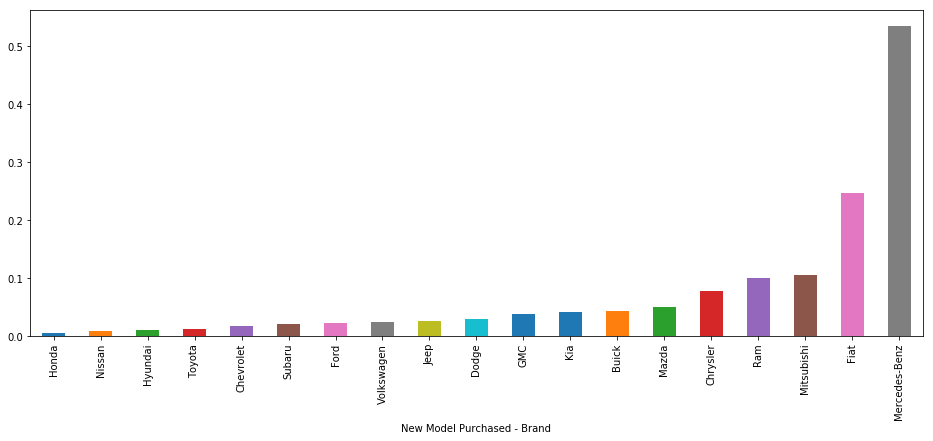

In [23]:
(-1*np.log(np.sqrt(catByBrand.multiply(catOverall, axis='index')).sum())).sort_values().plot(kind='bar',figsize=(16,6))

In [24]:
a = dfWorking.groupby(['Concatenated Groups','Age Bucket'])['Sales Weighting'].sum().unstack().fillna(0.0)
catByAge = a/a.sum()

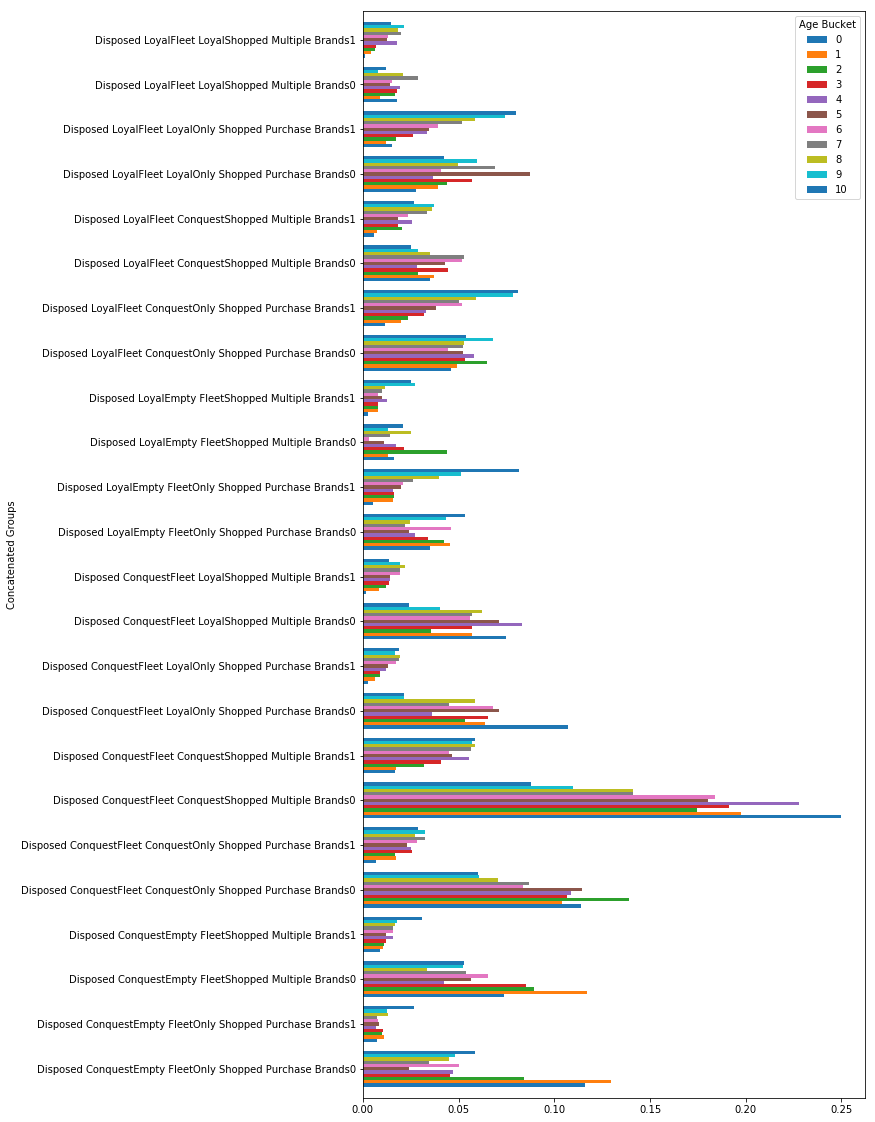

In [25]:
cols = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
catByAge = catByAge[cols]
catByAge[cols].plot(kind='barh', figsize=(9,20), width=0.8)

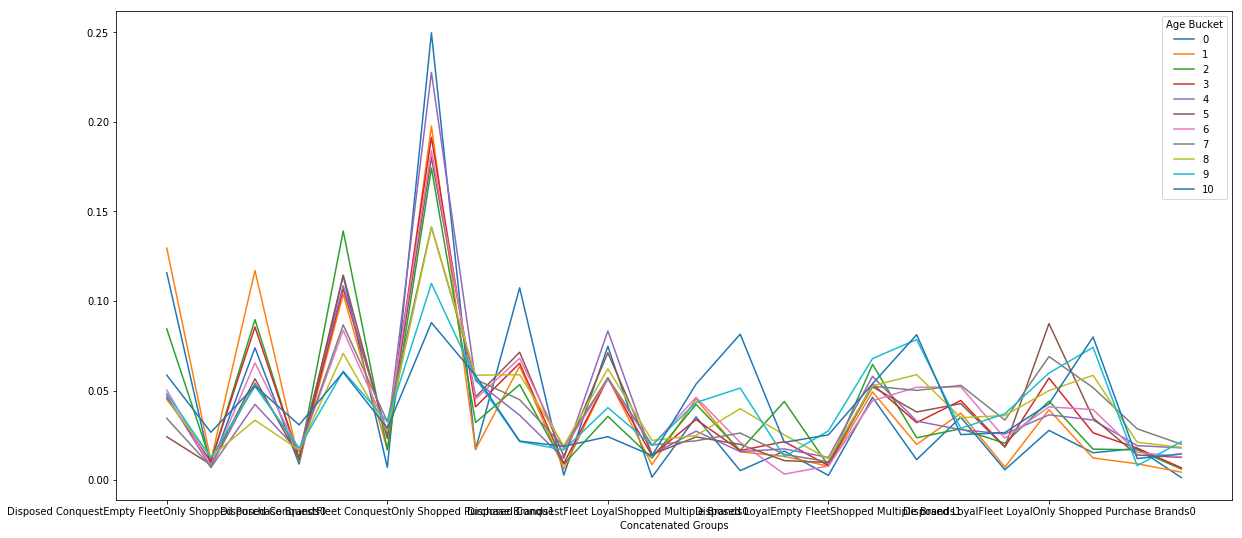

In [26]:
cols = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
catByAge = catByAge[cols]
catByAge[cols].plot(kind='line', figsize=(20,9))

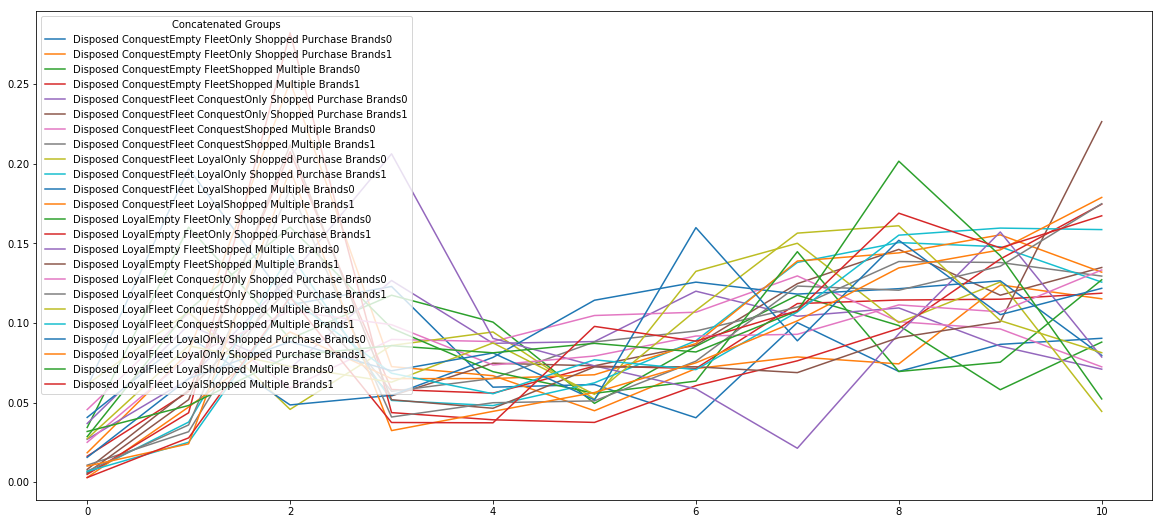

In [27]:
a = dfWorking.groupby(['Concatenated Groups','Age Bucket'])['Sales Weighting'].sum().unstack().fillna(0.0).drop(' ', axis=1).T
catByAge = a/a.sum()
catByAge.index=cols
catByAge.plot(kind='line', figsize=(20,9))

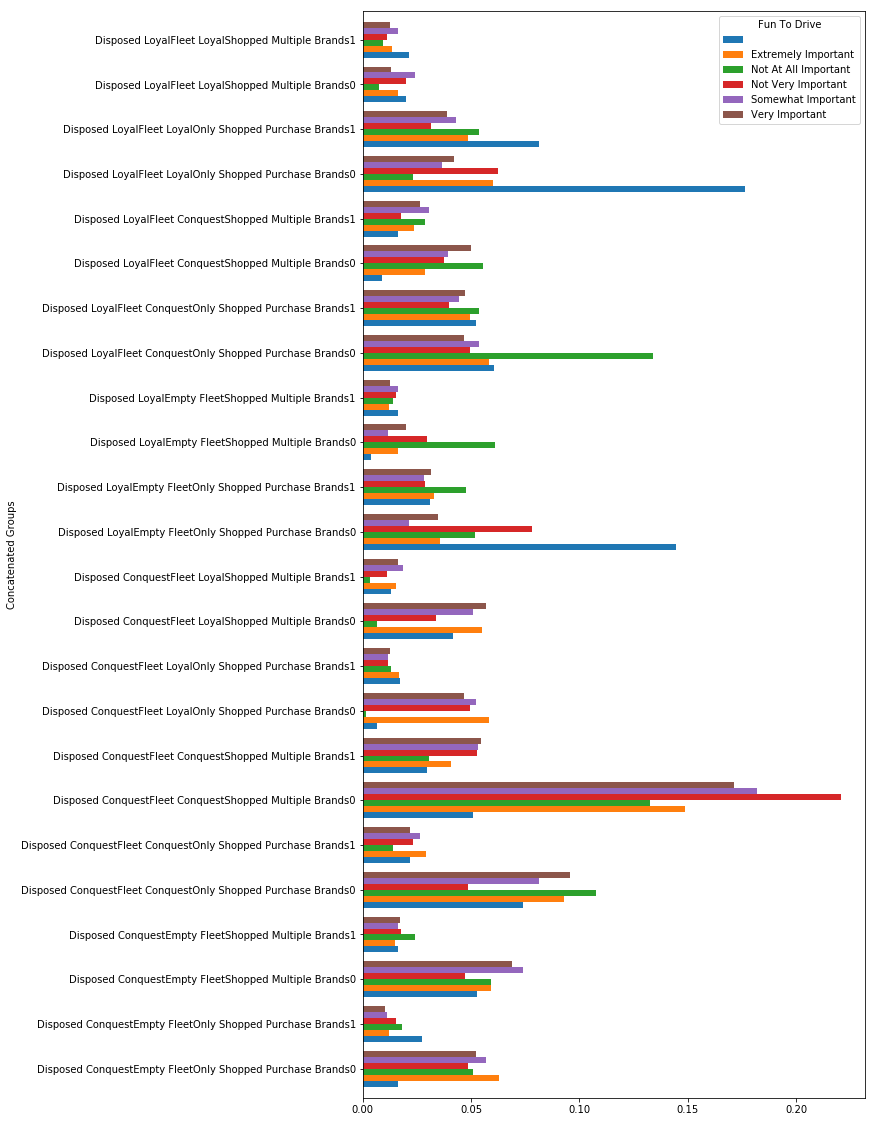

In [28]:
a = dfWorking.groupby(['Concatenated Groups','Fun To Drive'])['Sales Weighting'].sum().unstack().fillna(0.0)
catByIncome = a/a.sum()
catByIncome.plot(kind='barh', figsize=(9,20), width=0.8)

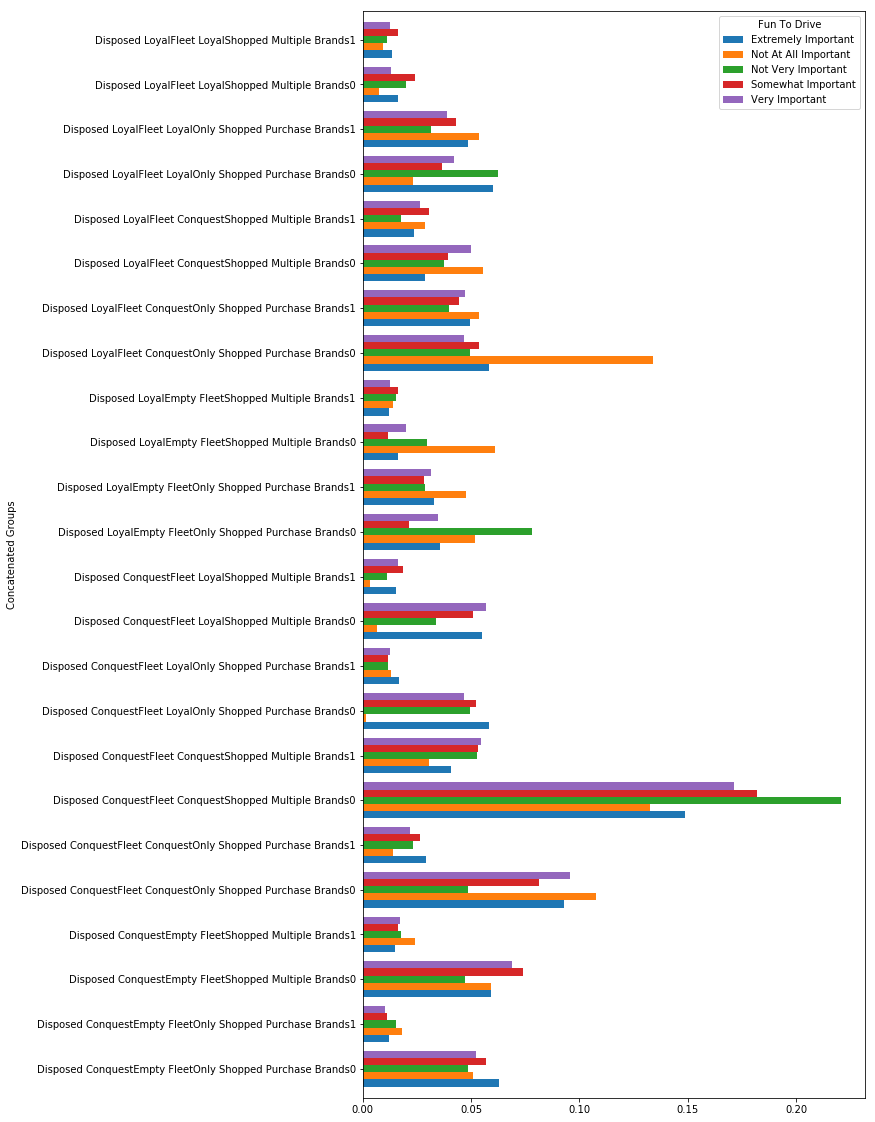

In [29]:
a = dfWorking.groupby(['Concatenated Groups','Fun To Drive'])['Sales Weighting'].sum().unstack().fillna(0.0)
catByIncome = a/a.sum()
catByIncome.drop(' ',axis=1).plot(kind='barh', figsize=(9,20), width=0.8)

In [30]:
#pd.DataFrame(dfWorking.columns).to_excel('working cols2.xlsx')

In [31]:
dfDistanceCols = pd.read_excel('working cols.xlsx')

In [32]:
a = dfDistanceCols[dfDistanceCols['Status']=='keep']
cols = list(a['Column'])
numericCols = a[a['type']=='Numeric']['Column']
dfDistance = dfWorking[cols]
dfDistance = dfDistance[~dfDistance['New Model Segment'].isin(['Full-Size Pickup', 'Heavy Duty Pickup','Luxury Multi-Function','Luxury Utility','Luxury Car','Full-Size Passenger Van','Full-Size Passenger Van','Compact Pickup','Premium Convertible/Roadster','Premium Coupe'])]
dfDistance = dfDistance[~dfDistance['New Model Purchased - Brand'].isin(['Audi', 'BMW','Jaguar','Infiniti','Mercedes-Benz'])]

In [33]:
#a = dfDistanceCols[dfDistanceCols['Status']=='keep']
#cols = list(a['Column'])
#numericCols = a[a['type']=='Numeric']['Column']
#dfDistance = dfWorking[cols]
#dfDistance = dfDistance[dfDistance['New Model Segment'].isin(['Full-Size Pickup', 'Heavy Duty Pickup'])]

In [34]:
dfDistance['New Model Segment'].unique()

array(['Mid-Size Car', 'Near Luxury', 'Small Car', 'Large Car',
       'Small Multi-Function', 'Mid-Size Multi-Function', 'Entry Utility',
       'Mid-Specialty', 'Mid-Size Crossover Utility',
       'Mid-Size Traditional Utility', 'Large Utility',
       'Near Luxury Utility'], dtype=object)

In [35]:
for c in numericCols:
    print(c)
    dfDistance[c] = pd.to_numeric(dfDistance[c].replace(' ',np.nan))

Miles Driven Per Month on Average
Mpg - City
Mpg - Highway
Total Children In Household
Children Under 6
Children 6 To 12
Children 13 To 17
People 18 or Older
Total In Household
Purchase Price (100's)
Model Price Z score
Segment Price Z score


In [49]:
b = dfDistance.groupby('Concatenated Groups')['Sales Weighting'].sum()#.unstack().fillna(0.0)
(b/b.sum()).sort_values(ascending=False)

Concatenated Groups
Disposed ConquestFleet ConquestShopped Multiple Brands0         0.156334
Disposed ConquestFleet ConquestOnly Shopped Purchase Brands0    0.091073
Disposed ConquestEmpty FleetShopped Multiple Brands0            0.072487
Disposed ConquestEmpty FleetOnly Shopped Purchase Brands0       0.061545
Disposed ConquestFleet LoyalShopped Multiple Brands0            0.054668
Disposed ConquestFleet LoyalOnly Shopped Purchase Brands0       0.051981
Disposed LoyalFleet ConquestOnly Shopped Purchase Brands0       0.049345
Disposed LoyalFleet ConquestOnly Shopped Purchase Brands1       0.046631
Disposed LoyalFleet LoyalOnly Shopped Purchase Brands0          0.045792
Disposed ConquestFleet ConquestShopped Multiple Brands1         0.043979
Disposed LoyalFleet LoyalOnly Shopped Purchase Brands1          0.042370
Disposed LoyalEmpty FleetOnly Shopped Purchase Brands0          0.040583
Disposed LoyalFleet ConquestShopped Multiple Brands0            0.035638
Disposed LoyalEmpty FleetOnly S

In [37]:
def groupedWeightedAvg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

In [38]:
list(dfDistance.columns)

['ID',
 'Sales Weighting',
 'New Model Purchased (Alpha Order)',
 'New Model Purchased - Brand',
 'New Model - Corporation',
 'New Model Purchased - Region Origin',
 'New Model Segment',
 'Miles Driven Per Month on Average',
 'Mpg - City',
 'Mpg - Highway',
 'Gender',
 'Marital Status',
 'Lifestage',
 'Lifestage Variable (1)',
 'Lifestage Variable (2)',
 'Lifestage Plus Affluence (1)',
 'Lifestage Plus Affluence (2)',
 'Socioeconomic Groups (8)',
 'Age Bucket',
 'Total Children In Household',
 'Children Under 6',
 'Children 6 To 12',
 'Children 13 To 17',
 'People 18 or Older',
 'Total In Household',
 'Education',
 'Employment FT/PT/Self',
 'Occupation',
 'Total Family Pre-Tax Income',
 'Economic Outlook',
 'Ethnic Group (1)',
 'Location Of Residence',
 'Customer Region Classification',
 'State',
 'Research - Any Other Online/Internet Searches',
 'Research - AutoTrader.com',
 'Research - Car and Driver',
 'Research - Car Shows',
 'Research - CarGurus',
 'Research - CarMax',
 'Research 

In [39]:
dfResults = pd.DataFrame(dfDistance.groupby('Concatenated Groups')['Sales Weighting'].sum())
dfResults.columns=['Overall']
dfResults = dfResults.T
dfResults['Count'] = dfDistance['ID'].count()
dfResults = dfResults.T
#start loop at brand column, do not include ID and Sales Weight
for c in dfDistance.drop('Concatenated Groups',axis=1).columns[2:]:
    print(c)
    if is_numeric_dtype(dfDistance[c]):
        b = pd.DataFrame(dfDistance.groupby('Concatenated Groups').apply(groupedWeightedAvg,c,'Sales Weighting'))
        b.columns=[c]
        count = dfDistance[c].dropna().count()
        b=b.T
        b['Count']= count
        b=b.T
        dfResults = pd.concat([dfResults,b], axis=1)
    else:
        a = dfDistance.groupby(['Concatenated Groups',c])['Sales Weighting'].sum().unstack().fillna(0.0)
        counter = pd.DataFrame(dfDistance.groupby(['Concatenated Groups',c])['ID'].count().unstack().sum())
        counter.columns=['Count']
        counter=counter.T
        #drop rows that did not respond
        if ' ' in list(a.columns):
            a=a.drop(' ', axis=1)
            counter = counter.drop(' ', axis=1)
        if '' in list(a.columns):
            a=a.drop(' ', axis=1)
            counter = counter.drop('', axis=1)
        #calculate percentages for each unstacked value
        b = a
        b = pd.concat([counter,b], axis=0)
        #prepend column name to column values in unstacked frame
        name = b.columns.name
        newCols = []
        for d in b.columns:
            newCols.append(name+'_'+d)
        b.columns=newCols

        dfResults = pd.concat([dfResults,b], axis=1)

New Model Purchased (Alpha Order)
New Model Purchased - Brand
New Model - Corporation
New Model Purchased - Region Origin
New Model Segment
Miles Driven Per Month on Average
Mpg - City
Mpg - Highway
Gender
Marital Status
Lifestage
Lifestage Variable (1)
Lifestage Variable (2)
Lifestage Plus Affluence (1)
Lifestage Plus Affluence (2)
Socioeconomic Groups (8)
Age Bucket
Total Children In Household
Children Under 6
Children 6 To 12
Children 13 To 17
People 18 or Older
Total In Household
Education
Employment FT/PT/Self
Occupation
Total Family Pre-Tax Income
Economic Outlook
Ethnic Group (1)
Location Of Residence
Customer Region Classification
State
Research - Any Other Online/Internet Searches
Research - AutoTrader.com
Research - Car and Driver
Research - Car Shows
Research - CarGurus
Research - CarMax
Research - Cars.com
Research - Consumer Reports
Research - Costco Auto
Research - Dealership Websites
Research - Edmunds
Research - Events such as Ride and Drive
Research - Friends and Famil

In [40]:
percentages = dfResults.divide(dfResults['Overall'], axis='index')
percentages = percentages.drop('Count')
means = percentages.mean()
stDev = percentages.std()
sigmaDeltas = ((percentages-means)/stDev).drop('Overall', axis=1)
a = dfDistance.groupby('Concatenated Groups')['Sales Weighting'].sum()
a/a.sum()
sd = pd.concat([(a/a.sum()),pd.concat([pd.DataFrame(dfResults.drop('Overall', axis=1).loc['Count',:]).T,sigmaDeltas])], axis=1).sort_values('Sales Weighting', ascending=False)
sd = sd[list(numericCols)+[i for i in list(sd.columns) if i not in list(numericCols)]]
sd.to_excel('sigma deltas.xlsx')

In [41]:
dfResults.to_excel('category counts.xlsx')

In [42]:
(dfDistance.groupby(['New Model Purchased - Brand','Concatenated Groups'])['Sales Weighting'].sum().unstack()).divide(dfDistance.groupby(['Concatenated Groups'])['Sales Weighting'].sum(), axis=1).to_excel('Brand Breakdown by column.xlsx')

In [43]:
percentages

,Overall,New Model Purchased (Alpha Order)_Buick Enclave,New Model Purchased (Alpha Order)_Buick Encore,New Model Purchased (Alpha Order)_Buick LaCrosse,New Model Purchased (Alpha Order)_Buick Regal,New Model Purchased (Alpha Order)_Buick Verano,New Model Purchased (Alpha Order)_Chevrolet Cruze,New Model Purchased (Alpha Order)_Chevrolet Equinox,New Model Purchased (Alpha Order)_Chevrolet Impala,New Model Purchased (Alpha Order)_Chevrolet Malibu,...,Segment (Disposed)_Minivan,Segment (Disposed)_SUV,Segment (Disposed)_Small Pickup,Segment (Disposed)_Smaller Car,Segment (Disposed)_Sporty Car,Segment (Disposed)_Unspecified Car,Segment (Disposed)_Unspecified Truck,Model Age (Disposed)_0-6 yo,Model Age (Disposed)_5-7 yo,Model Age (Disposed)_7+
Disposed ConquestEmpty FleetOnly Shopped Purchase Brands0,1.0,0.001306,0.011364,0.002941,0.000000,0.002984,0.007915,0.011625,0.004283,0.033979,...,0.047024,0.217741,0.024933,0.389106,0.018235,0.010849,0.010873,0.164813,0.110115,0.722695
Disposed ConquestEmpty FleetOnly Shopped Purchase Brands1,1.0,0.005776,0.024503,0.003579,0.002515,0.006318,0.009091,0.020173,0.004300,0.036209,...,0.051278,0.240307,0.024412,0.431837,0.052908,0.018052,0.002990,0.498068,0.059196,0.424696
Disposed ConquestEmpty FleetShopped Multiple Brands0,1.0,0.001109,0.007236,0.001248,0.002082,0.003378,0.012096,0.003290,0.000000,0.006411,...,0.029330,0.226372,0.015860,0.406518,0.045314,0.002361,0.002398,0.122399,0.112551,0.757103
Disposed ConquestEmpty FleetShopped Multiple Brands1,1.0,0.006155,0.017624,0.003115,0.004503,0.005570,0.011301,0.015047,0.006415,0.018005,...,0.035955,0.295561,0.015803,0.425231,0.039001,0.003532,0.000646,0.440406,0.114446,0.439312
Disposed ConquestFleet ConquestOnly Shopped Purchase Brands0,1.0,0.005297,0.010559,0.002981,0.002209,0.002689,0.005349,0.015712,0.001447,0.020411,...,0.048782,0.297487,0.012231,0.313036,0.044192,0.000000,0.005878,0.192789,0.137430,0.664030
Disposed ConquestFleet ConquestOnly Shopped Purchase Brands1,1.0,0.010484,0.023203,0.004613,0.003890,0.005394,0.005022,0.016715,0.003959,0.003334,...,0.052003,0.320731,0.006689,0.381740,0.037124,0.004470,0.000000,0.530337,0.107359,0.354215
Disposed ConquestFleet ConquestShopped Multiple Brands0,1.0,0.008743,0.011743,0.002315,0.002574,0.003133,0.004362,0.009153,0.002529,0.002973,...,0.046700,0.305731,0.011178,0.273852,0.053514,0.005379,0.003537,0.121596,0.108577,0.763438
Disposed ConquestFleet ConquestShopped Multiple Brands1,1.0,0.013960,0.015584,0.003541,0.003434,0.004262,0.000899,0.012973,0.004254,0.009851,...,0.065210,0.351187,0.009940,0.356977,0.028243,0.002821,0.002298,0.416163,0.120409,0.458622
Disposed ConquestFleet LoyalOnly Shopped Purchase Brands0,1.0,0.001547,0.003364,0.000000,0.000000,0.000000,0.022491,0.041291,0.000000,0.017880,...,0.065155,0.237290,0.020921,0.287908,0.057170,0.001551,0.010200,0.172434,0.074963,0.745567
Disposed ConquestFleet LoyalOnly Shopped Purchase Brands1,1.0,0.004661,0.007415,0.003932,0.000474,0.000541,0.025676,0.025324,0.004049,0.022727,...,0.071325,0.339753,0.006441,0.367194,0.025784,0.006994,0.006429,0.518271,0.091370,0.386135


In [44]:
percentages.mean()

Overall                                                        1.000000
New Model Purchased (Alpha Order)_Buick Enclave                0.004101
New Model Purchased (Alpha Order)_Buick Encore                 0.008229
New Model Purchased (Alpha Order)_Buick LaCrosse               0.002594
New Model Purchased (Alpha Order)_Buick Regal                  0.001730
New Model Purchased (Alpha Order)_Buick Verano                 0.002416
New Model Purchased (Alpha Order)_Chevrolet Cruze              0.011368
New Model Purchased (Alpha Order)_Chevrolet Equinox            0.025939
New Model Purchased (Alpha Order)_Chevrolet Impala             0.005561
New Model Purchased (Alpha Order)_Chevrolet Malibu             0.018452
New Model Purchased (Alpha Order)_Chevrolet SS                 0.000228
New Model Purchased (Alpha Order)_Chevrolet Sonic              0.004028
New Model Purchased (Alpha Order)_Chevrolet Spark              0.003620
New Model Purchased (Alpha Order)_Chevrolet Suburban           0

In [45]:
var = 'New Model Segment'
for i in dfDistance[var].unique():
    dfResults = pd.DataFrame(dfDistance[dfDistance[var]==i].groupby('Concatenated Groups')['Sales Weighting'].sum())
    dfResults.columns=['Overall']
    dfResults = dfResults.T
    dfResults['Count'] = dfDistance[dfDistance[var]==i]['ID'].count()
    dfResults = dfResults.T
    print(i)
    #start loop at brand column, do not include ID and Sales Weight
    for c in dfDistance.drop('Concatenated Groups',axis=1).columns[2:]:
        
        if is_numeric_dtype(dfDistance[dfDistance[var]==i][c]):
            b = pd.DataFrame(dfDistance[dfDistance[var]==i].groupby('Concatenated Groups').apply(groupedWeightedAvg,c,'Sales Weighting'))
            b.columns=[c]
            count = dfDistance[dfDistance[var]==i][c].dropna().count()
            b=b.T
            b['Count']= count
            b=b.T
            dfResults = pd.concat([dfResults,b], axis=1)
        else:
            a = dfDistance[dfDistance[var]==i].groupby(['Concatenated Groups',c])['Sales Weighting'].sum().unstack().fillna(0.0)
            counter = pd.DataFrame(dfDistance[dfDistance[var]==i].groupby(['Concatenated Groups',c])['ID'].count().unstack().sum())
            counter.columns=['Count']
            counter=counter.T
            #drop rows that did not respond
            if ' ' in list(a.columns):
                a=a.drop(' ', axis=1)
                counter = counter.drop(' ', axis=1)
            if '' in list(a.columns):
                a=a.drop(' ', axis=1)
                counter = counter.drop('', axis=1)
            #calculate percentages for each unstacked value
            b = a
            b = pd.concat([counter,b], axis=0)
            #prepend column name to column values in unstacked frame
            name = b.columns.name
            newCols = []
            for d in b.columns:
                newCols.append(name+'_'+d)
            b.columns=newCols

            dfResults = pd.concat([dfResults,b], axis=1)
            
    percentages = dfResults.divide(dfResults['Overall'], axis='index')
    percentages = percentages.drop('Count')
    means = percentages.mean()
    stDev = percentages.std()
    sigmaDeltas = ((percentages-means)/stDev).drop('Overall', axis=1)
    a = dfDistance[dfDistance[var]==i].groupby('Concatenated Groups')['Sales Weighting'].sum()
    a/a.sum()
    sd = pd.concat([(a/a.sum()),pd.concat([pd.DataFrame(dfResults.drop('Overall', axis=1).loc['Count',:]).T,sigmaDeltas])], axis=1).sort_values('Sales Weighting', ascending=False)
    sd = sd[list(numericCols)+[i for i in list(sd.columns) if i not in list(numericCols)]]
    sd.T.to_excel('sigma deltas '+i.replace('/','_')+'.xlsx')

Mid-Size Car
Near Luxury
Small Car


KeyboardInterrupt: 

In [ ]:
percentages['How Likely to Recommend Own Vehicle Brand_10 - Extremely Likely']

In [ ]:
dfMain = df[df['Main Survey Version']=='Main Study (Paper)']

In [ ]:
df.groupby(['New Model Purchased - Brand','Disposed Loyal Conquest Other'])['Sales Weighting'].sum().unstack().divide(df.groupby(['New Model Purchased - Brand'])['Sales Weighting'].sum(), axis=0).loc[['Chevrolet','Ford','Honda','Hyundai','Nissan','Subaru','Toyota','Volkswagen']]

In [ ]:
dfMain.groupby(['New Model Purchased - Brand','Disposed Loyal Conquest Other'])['Sales Weighting'].sum().unstack().divide(dfMain.groupby(['New Model Purchased - Brand'])['Sales Weighting'].sum(), axis=0).loc[['Chevrolet','Ford','Honda','Hyundai','Nissan','Subaru','Toyota','Volkswagen']]

In [ ]:
percentages

In [ ]:
#get model sales percentages
#get disposed loyalty percentages
#calculate sales percentage weights
#weighted sales percentage = (model n)*(model weight)/(total weight)
#model weight = (sales percentage)*(total weight)/(model n)
#need to chose decent total weight? total sales count? what is a good minimum model weight?
#using sales weights, calculate diposed loyalty weights
#(model disposed loyalty percentage) = (model weighted n)*(model loyalty weight)/(total weight)
#recalculate sales weights using (sales+loyalty) model weights
#recalculate loyalty weights
#loop until convergence
#need test for convergence. average weight delta from last iteration? check for bimodality/nonconvergence/divergence?
#test with two models first, check for convergence/divergence and make sure weighting algo works